In [1]:
import os
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = "data"

FUNDAMENTAL_CODE = '851'
MEDIO_CODE = '852'
SUPERIOR_CODE = '853'
TECNICO_CODE = '854'
APOIO_CODE = '855'
OUTRAS_CODE = '859'

CLASSES = [FUNDAMENTAL_CODE, MEDIO_CODE, SUPERIOR_CODE, TECNICO_CODE, APOIO_CODE, OUTRAS_CODE]

GRAFO_FORMAL_SOCIOS_EMPRESA = os.path.join(DATA_DIR, "grafo_formal_socios_empresas.gexf")

GRAFO_SOCIOS_FILE = os.path.join(DATA_DIR, "grafo_socios_socios.gexf")
GRAFO_EMPRESAS_FILE = os.path.join(DATA_DIR, "grafo_empresas_empresas.gexf")

In [3]:
def print_info(G):
    print(nx.info(G))
    print("Nós isolados: {}\nÉ bipartido: {}".format(len(list(nx.isolates(G))), bipartite.is_bipartite(G)))
    print("Número de arestas de um nó para si mesmo: {}".format(nx.number_of_selfloops(G)))

In [4]:
import math
def entropy(x):
    # Normalize
    total = sum(x)
    x = [xi / total for xi in x]
    H = sum([-xi * math.log2(xi) for xi in x])
    return H

# scipy.stats.entropy().
def gini(x):    
    x = [xi for xi in x]
    n = len(x)
    gini_num = sum([sum([abs(x_i - x_j) for x_j in x]) for x_i in x])
    gini_den = 2.0 * n * sum(x)
    return gini_num / gini_den

def path_length_histogram(G, title=None):
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest = sum([
        list(length_target.values())
        for length_target
        in length_source_target.values()],
    [])
    # Calculate integer bins
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)]
    # Plot histogram
    plt.hist(all_shortest, bins=bins, rwidth=0.8)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Count")

In [5]:
G_SE = nx.read_gexf(GRAFO_FORMAL_SOCIOS_EMPRESA)
G_SOC = nx.read_gexf(GRAFO_SOCIOS_FILE)
G_EMP = nx.read_gexf(GRAFO_EMPRESAS_FILE)

In [6]:
AFFILIATION = "Afiliação"
SOCIOS = "Socios"
EMPRESAS = "Empresas"
graphs = {AFFILIATION: G_SE, SOCIOS: G_SOC, EMPRESAS: G_EMP}

In [11]:
for key, G in graphs.items():
    print("\n", key)
    print_info(G)
    print("---")


 Afiliação
Name: 
Type: DiGraph
Number of nodes: 227596
Number of edges: 194494
Average in degree:   0.8546
Average out degree:   0.8546
Nós isolados: 0
É bipartido: False
Número de arestas de um nó para si mesmo: 0
---

 Socios
Name: 
Type: Graph
Number of nodes: 103113
Number of edges: 194683
Average degree:   3.7761
Nós isolados: 0
É bipartido: False
Número de arestas de um nó para si mesmo: 0
---

 Empresas
Name: 
Type: Graph
Number of nodes: 35373
Number of edges: 521274
Average degree:  29.4730
Nós isolados: 0
É bipartido: False
Número de arestas de um nó para si mesmo: 0
---


----

## Global Measures

In [9]:
avg_clustering = {}
for key, G in graphs.items():
    print("\n", key)
    avg_clustering[key] = nx.average_clustering(G)
    print(avg_clustering[key])
    print("---")


 Afiliação
0.0007560093256543414
---

 Socios
0.3421721176275427
---

 Empresas
0.6143117303281495
---


In [10]:
density = {}
for key, G in graphs.items():
    print("\n", key)
    density[key] = nx.density(G)
    print(density[key])
    print("---")


 Afiliação
3.7547313279810882e-06
---

 Socios
3.662143790137784e-05
---

 Empresas
0.0008332293303207577
---


In [7]:
def length_of_list(list_of_numbers, number):
    x = [i for i in list_of_numbers if i > number]
    return len(x)

In [17]:
def plot_pa(G, label):
    dictlist = []
    px = []

    for key, value in G.degree():
        dictlist.append(value)

    for z in sorted(set(dictlist)):
        px.append(length_of_list(dictlist, z)/len(dictlist))
    plt.loglog(sorted(set(dictlist)), px, marker='o', label=label)


 Afiliação
---

 Socios
---

 Empresas
---


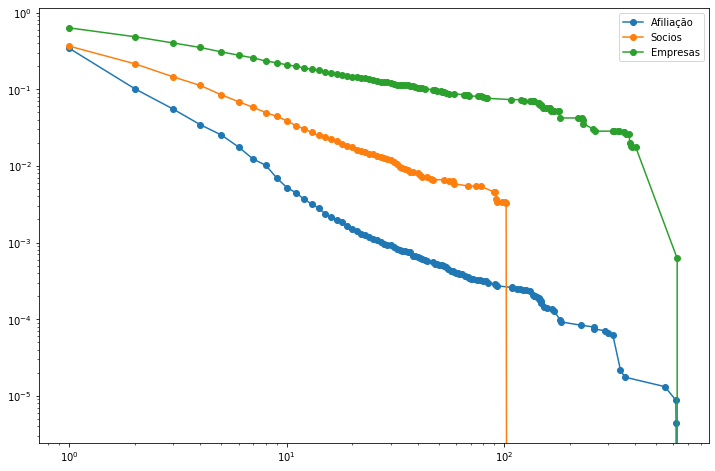

In [18]:
plt.figure(figsize=(12, 8))
for key, G in graphs.items():
    print("\n", key)
    plot_pa(G, key)
    print("---")
plt.legend()

In [ ]:
entropies = {}
for key, v in eigenvector.items():
    entropies[key] = entropy(v)
    
    display()

In [ ]:
# Demorado
nx.average_node_connectivity(G_karate)

In [7]:
for key, G in graphs.items():
    print("\n", key)
    nx.diameter(G)
    print("---")


 Afiliação


NetworkXError: Found infinite path length because the digraph is not strongly connected

In [ ]:
nx.average_shortest_path_length(G)

In [ ]:
entropy(nx.eigenvector_centrality(G_karate).values())

In [ ]:
gini(nx.eigenvector_centrality(G_karate).values())

# Local Measures

In [16]:
betweenness = {}
for key, G in graphs.items():
    print("\n", key)
    betweenness[key] = nx.betweenness_centrality(G, normalized=False)
    sorted(betweenness[key].items(), key=lambda x:x[1], reverse=True)[0:10]
    print("---")


 Afiliação


KeyboardInterrupt: 

In [19]:
#  Individuals with high eigenvector centrality create many short paths between others, 
# but not necessarily the shortest paths
eigenvector = {}
for key, G in graphs.items():
    print("\n", key)
    eigenvector[key] = nx.eigenvector_centrality(G)
    display(sorted(eigenvector[key].items(), key=lambda x:x[1], reverse=True)[0:10])
    print("---")


 Afiliação


[('64047806000118', 0.8239768550409692),
 ('829603000109', 0.38099527753995904),
 ('4718981000168', 0.38099527753995904),
 ('66866278000154', 0.07316223059308725),
 ('4778582000192', 0.04215114747611782),
 ('4778588000160', 0.04215114747611782),
 ('4778588000240', 0.04215114747611782),
 ('4778588000402', 0.04215114747611782),
 ('4778588000593', 0.04215114747611782),
 ('4778588000674', 0.04215114747611782)]

---

 Socios


[('***825215**ANTONIO LUIZ VITA SOUZA', 0.05407377511378116),
 ('***625898**LUIZ CARLOS PASSETTI', 0.05407377511378116),
 ('***835508**FERNANDO ALBERTO SCHWARTZ DE MAGALHAES', 0.05407377511378116),
 ('***931467**MAURO MOREIRA', 0.05407377511378116),
 ('***581634**HENRIQUE GONDIM DE OLIVEIRA', 0.05407377511378116),
 ('***849508**IDESIO DA SILVA COELHO JUNIOR', 0.05407377511378116),
 ('***840298**MARCOS ANTONIO QUINTANILHA', 0.05407377511378116),
 ('***195248**MARIA ELISA DE CASTRO GIANINI', 0.05407377511378116),
 ('***647617**SERGIO RICARDO ROMANI', 0.05407377511378116),
 ('***071677**JOAO RICARDO PEREIRA DA COSTA', 0.05407377511378116)]

---

 Empresas


[('3818379000130', 0.04001287226340523),
 ('3818379000300', 0.04001287226340523),
 ('3818379000482', 0.04001287226340523),
 ('3818379000563', 0.04001287226340523),
 ('3818379000644', 0.04001287226340523),
 ('3818379000725', 0.04001287226340523),
 ('3818379000806', 0.04001287226340523),
 ('3818379000997', 0.04001287226340523),
 ('3818379001020', 0.04001287226340523),
 ('3818379001454', 0.04001287226340523)]

---


In [24]:
for key in eigenvector:
    print("\n", key)
    display(sorted(eigenvector[key].items(), key=lambda x:x[1], reverse=True)[0:10])
    print("---")


 Afiliação


[('64047806000118', 0.8239768550409692),
 ('829603000109', 0.38099527753995904),
 ('4718981000168', 0.38099527753995904),
 ('66866278000154', 0.07316223059308725),
 ('4778582000192', 0.04215114747611782),
 ('4778588000160', 0.04215114747611782),
 ('4778588000240', 0.04215114747611782),
 ('4778588000402', 0.04215114747611782),
 ('4778588000593', 0.04215114747611782),
 ('4778588000674', 0.04215114747611782)]

---

 Socios


[('***825215**ANTONIO LUIZ VITA SOUZA', 0.05407377511378116),
 ('***625898**LUIZ CARLOS PASSETTI', 0.05407377511378116),
 ('***835508**FERNANDO ALBERTO SCHWARTZ DE MAGALHAES', 0.05407377511378116),
 ('***931467**MAURO MOREIRA', 0.05407377511378116),
 ('***581634**HENRIQUE GONDIM DE OLIVEIRA', 0.05407377511378116),
 ('***849508**IDESIO DA SILVA COELHO JUNIOR', 0.05407377511378116),
 ('***840298**MARCOS ANTONIO QUINTANILHA', 0.05407377511378116),
 ('***195248**MARIA ELISA DE CASTRO GIANINI', 0.05407377511378116),
 ('***647617**SERGIO RICARDO ROMANI', 0.05407377511378116),
 ('***071677**JOAO RICARDO PEREIRA DA COSTA', 0.05407377511378116)]

---

 Empresas


[('3818379000130', 0.04001287226340523),
 ('3818379000300', 0.04001287226340523),
 ('3818379000482', 0.04001287226340523),
 ('3818379000563', 0.04001287226340523),
 ('3818379000644', 0.04001287226340523),
 ('3818379000725', 0.04001287226340523),
 ('3818379000806', 0.04001287226340523),
 ('3818379000997', 0.04001287226340523),
 ('3818379001020', 0.04001287226340523),
 ('3818379001454', 0.04001287226340523)]

---


In [25]:
# Function to plot a single histogram
def centrality_histogram(x, title=None):
    plt.hist(x, density=True)
    plt.title(title)
    plt.xlabel("Centrality")
    plt.ylabel("Density")

def eigenvector_histogram():
    # Create a figure
    plt.figure(figsize=(15, 8))
    # Calculate centralities for each example and plot
    plt.subplot(1, 3, 1)
    centrality_histogram(
        eigenvector[AFFILIATION].values(), title=AFFILIATION)
    plt.subplot(1, 3, 2)
    centrality_histogram(
        eigenvector[SOCIOS].values(), title=SOCIOS)
    plt.subplot(1, 3, 3)
    centrality_histogram(
        eigenvector[EMPRESAS].values(), title=EMPRESAS)

    # Adjust the layout
    plt.tight_layout()

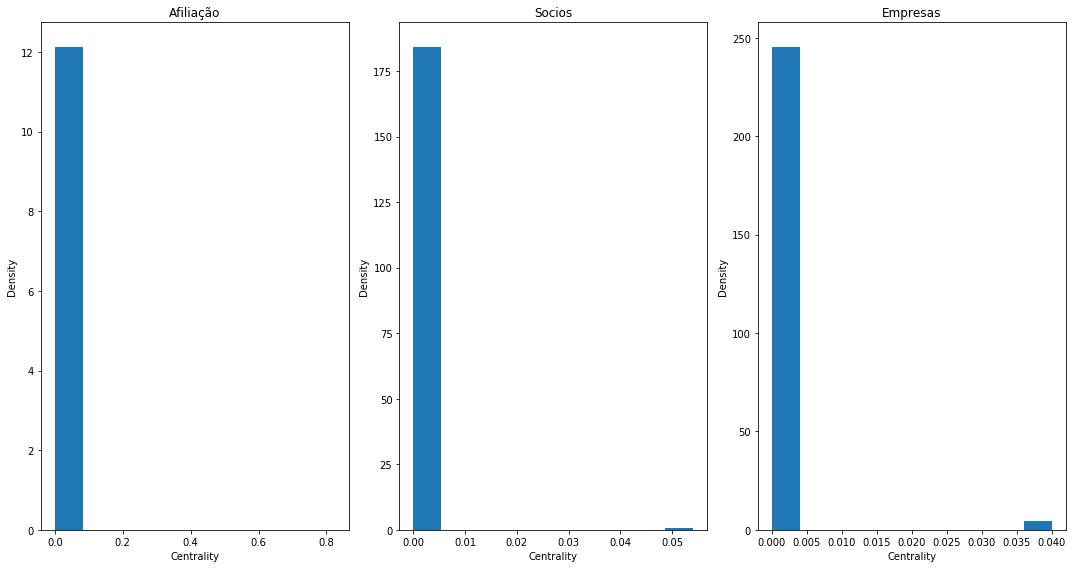

In [26]:
eigenvector_histogram()

In [27]:
# Find k-cores
G_core_30 = nx.k_core(G_EMP, 30)
G_core_60 = nx.k_core(G_EMP, 60)

# Visualize network and k-cores
# nx.draw_networkx(
#     G_social, pos=pos, node_size=0,
#     edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_30, pos=pos, node_size=0,
    edge_color="#7F7FEF", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_60, pos=pos, node_size=0,
    edge_color="#AFAF33", alpha=0.05, with_labels=False)

NameError: name 'pos' is not defined

In [18]:
# So, a node with high closeness centrality is literally close to other nodes.
closeness = {}
for key, G in graphs.items():
    print("\n", key)
    closeness[key] = nx.closeness_centrality(G)
    print(sorted(closeness[key].items(), key=lambda x:x[1], reverse=True)[0:10])
    print("---")

[('***825215**ANTONIO LUIZ VITA SOUZA', 0.003307083559624486),
 ('***625898**LUIZ CARLOS PASSETTI', 0.003307083559624486),
 ('***835508**FERNANDO ALBERTO SCHWARTZ DE MAGALHAES', 0.003307083559624486),
 ('***931467**MAURO MOREIRA', 0.003307083559624486),
 ('***581634**HENRIQUE GONDIM DE OLIVEIRA', 0.003307083559624486),
 ('***849508**IDESIO DA SILVA COELHO JUNIOR', 0.003307083559624486),
 ('***840298**MARCOS ANTONIO QUINTANILHA', 0.003307083559624486),
 ('***195248**MARIA ELISA DE CASTRO GIANINI', 0.003307083559624486),
 ('***647617**SERGIO RICARDO ROMANI', 0.003307083559624486),
 ('***071677**JOAO RICARDO PEREIRA DA COSTA', 0.003307083559624486)]

In [19]:
#If an individual's local clustering coefficient is low, it suggests they aren't well-connected. 
# If the coefficient is high, it suggests that an individual's connections are redundant.
triangles = nx.triangles(G_SOC)
sorted(triangles.items(), key=lambda x:x[1], reverse=True)[0:10]

[('***825215**ANTONIO LUIZ VITA SOUZA', 57970),
 ('***625898**LUIZ CARLOS PASSETTI', 57970),
 ('***835508**FERNANDO ALBERTO SCHWARTZ DE MAGALHAES', 57970),
 ('***931467**MAURO MOREIRA', 57970),
 ('***581634**HENRIQUE GONDIM DE OLIVEIRA', 57970),
 ('***849508**IDESIO DA SILVA COELHO JUNIOR', 57970),
 ('***840298**MARCOS ANTONIO QUINTANILHA', 57970),
 ('***195248**MARIA ELISA DE CASTRO GIANINI', 57970),
 ('***647617**SERGIO RICARDO ROMANI', 57970),
 ('***071677**JOAO RICARDO PEREIRA DA COSTA', 57970)]

---

In [ ]:
betweenness = nx.betweenness_centrality(G, normalized=False)
sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[0:10]

## Comunidades

In [ ]:
# Generate the network
G_karate = nx.karate_club_graph()
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
len(communities)

In [ ]:
cliques = list(nx.find_cliques(G_karate))

In [ ]:
# Find max clique
max_clique = max(cliques, key=len)
max_clique
[0, 1, 2, 3, 13]

# Visualize maximum clique
node_color = [(0.5, 0.5, 0.5) for v in G_karate.nodes()]
for i, v in enumerate(G_karate.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(G_karate, node_color=node_color, pos=karate_pos)

In [ ]:
# Find k-cores
G_core_30 = nx.k_core(G_social, 30)
G_core_60 = nx.k_core(G_social, 60)

# Visualize network and k-cores
nx.draw_networkx(
    G_social, pos=pos, node_size=0,
    edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_30, pos=pos, node_size=0,
    edge_color="#7F7FEF", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_60, pos=pos, node_size=0,
    edge_color="#AFAF33", alpha=0.05, with_labels=False)

From the internet to airport trips, many networks are characterized by a few nodes with many connections, and many nodes with very few connections. These networks are called heavy-tailed because, when a histogram of the node degrees is drawn, the high-connectivity nodes form a tail.


The heavy tails of these networks can be seen by plotting their degree distributions. The following function plots the degree distribution of a network:

In [ ]:
def plot_degree_hist(G, title):
    """Plot histogram of node degrees."""
    plt.hist(dict(nx.degree(G)).values(), bins=range(1, 11))
    # Label axes
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title(title)
    
plt.figure(figsize=(7.5, 3.75))
ax = plt.subplot(1,2,1)
plot_degree_hist(G_preferential_35, '35 Nodes')
for spine in ax.spines.values():
    spine.set_visible(True)
ax = plt.subplot(1,2,2)
for spine in ax.spines.values():
    spine.set_visible(True)
plot_degree_hist(G_preferential_500, '500 Nodes')
plt.tight_layout()

Preferential attachment networks exhibit an additional property: they are scale-free. Degree distributions in scale-free networks follow a power law, which results in a similar structure at different scales. One way to see this is by comparing the preceding histograms. Despite very different scales, they have similar shapes.

---

# Drawing

In [ ]:
import networkx.algorithms.community as nxcom

def community_net(G_in):
    G_out = nx.Graph()
    node_color = []
    node_community = {}
    communities = nxcom.greedy_modularity_communities(G_in)
    for i, com in enumerate(communities):
        for v in com:
            G_out.add_node(v)
            node_color.append(get_color(i))
            node_community[v] = i
    G_out.add_edges_from(G_in.edges())
    return node_color, node_community, G_out

node_color, node_community, G = community_net(G_karate)
nx.draw_networkx(G, pos=nx.circular_layout(G), node_color=node_color)

In [ ]:
degrees = dict(G.degree())
labels = sorted(degrees.keys(), key=lambda x: degrees[x], reverse=True)
nlist = []
i, k = 0, 6
while i < len(labels):
    shell_labels = labels[i:i+k]
    ordered_labels = sorted(shell_labels, key=lambda x: node_community[x])
    nlist.append(ordered_labels)
    i += k
    k += 12
pos = nx.shell_layout(G, nlist=nlist)
cm = plt.get_cmap('cool')
nx.draw_networkx(
    G, pos, alpha=1, node_color=node_color, with_labels=True)

In [ ]:
import math
def residual_net(G):
    G_residual = nx.Graph(G)
    # Calculate weighted degrees
    degrees = dict((v, 0) for v in G_residual.nodes)
    for e in G_residual.edges:
        v, w = e
        degrees[v] += G_residual.edges[e]['count']
        degrees[w] += G_residual.edges[e]['count']
    # Calculate total edge weight in network
    M = sum([G_residual.edges[e]['count'] for e in G_residual.edges])
    # Find residual weight for each node pair
    for v in G_residual.nodes:
        for w in G_residual.nodes:
            dv = degrees[v]
            dw = degrees[w]
            # Only count each edge once
            if v >= w:
                continue
     # Expected fraction of weights associated with each endpoint
            # Factor of two adjusts normalization for excuding v >= w
            expected = (dv / M / 2) * (dw / M / 2) * 2 * M
            if expected == 0:
                continue
            try:
                count = G_residual.edges[v, w]['count']
                log_residual = math.log10(count) - math.log10(expected)
                G_residual.edges[v, w]['log_residual'] = log_residual
            except KeyError:
                continue
    return G_residual

# Generate residual network
G_residual = residual_net(G_frank)


# Find edges with residuals above a threshold
threshold = 3.2
edges = [
    (v, w) for v, w, d in G_residual.edges(data=True)
    if d['log_residual'] > threshold]
# Create a network with only those edges
G_threshold = G_residual.edge_subgraph(edges)
# Find largest connected component
G_giant = G_threshold.subgraph(max(nx.connected_components(G_threshold), key=len))


# Find communities
G = G_giant
node_color, node_community, G = community_net(G)
pos = nx.circular_layout(G)
nx.draw_networkx(
    G, pos=pos, node_size=100, node_color=node_color,
    edge_color='#999999', with_labels=False)


plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, pos=pos)
nx.draw_networkx(
    G, pos=pos, node_size=0, edge_color='#999999', with_labels=True)
# Add margin for labels
plt.xlim([-1.1, 1.1])

In [ ]:
plt.figure(figsize=(20, 20))
nx.draw(G_EMP, alpha=0.25, node_size=2)